# File and libraries

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


#filepath=r'dataset/df_ecom_2_2_mv_input.csv'

filepath=r'dataset/df_ecom_2_3_outliers_input.csv'

file_tag = "df_ecom_scaling_input"

# DSLabs functions

In [37]:
%run "dslabs_functions.py"


dslabs_functions lodaded


# Data functions

In [38]:
%run "data_functions.py"


data_functions loaded


# Load

In [39]:
# test_data=True
test_data=False

evaluate=True

if test_data==True:

    df=pd.read_csv(filepath)

    # 10% sample
    df=df.sample(frac=0.4, replace=False)
    

else:
    df=pd.read_csv(filepath)

 
target='is_purchase'
eval_metric_1='precision'
eval_metric_2='f2'
# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
df.sort_values(by='day', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188630 entries, 0 to 188629
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_code_lvl_1  188630 non-null  float64
 1   category_code_lvl_2  188630 non-null  float64
 2   price                188630 non-null  float64
 3   is_purchase          188630 non-null  int64  
 4   activity_in_session  188630 non-null  float64
 5   week_of_month        188630 non-null  int64  
 6   is_weekend           188630 non-null  int64  
 7   day                  188630 non-null  int64  
 8   brand_value          188630 non-null  float64
 9   product_category     188630 non-null  int64  
 10  time_of_day_sin      188630 non-null  float64
 11  time_of_day_cos      188630 non-null  float64
 12  day_of_week_sin      188630 non-null  float64
 13  day_of_week_cos      188630 non-null  float64
 14  hour_sin             188630 non-null  float64
 15  hour_cos             1

In [22]:
df.head()

,category_code_lvl_1,category_code_lvl_2,price,is_purchase,activity_in_session,week_of_month,is_weekend,day,brand_value,product_category,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
0,1.0,8.0,261.55,0,3.0,2,0,8,455.0,4924,0.624,-0.781,-0.775,-0.632,0.259,-0.966,0.669,-0.743
3655,0.0,3.0,915.08,1,4.0,2,0,8,779.2,2334,-0.975,0.221,-0.775,-0.632,-0.966,-0.259,0.866,0.500
3654,1.0,10.0,2.63,0,2.0,2,0,8,16.9,6584,0.624,-0.781,-0.775,-0.632,0.966,-0.259,0.105,0.995
3653,0.0,3.0,980.21,1,4.0,2,0,8,779.2,2335,0.624,-0.781,-0.775,-0.632,0.966,-0.259,0.208,0.978
3652,0.0,3.0,194.89,1,4.0,2,0,8,282.5,2118,-0.975,0.221,-0.775,-0.632,-0.707,-0.707,0.914,0.407


# Scale 1 - Standard Scaler

## Scale 1 strategy Application

In [46]:

def apply_strategy_1(df):

    df_copy=df.copy()
    
    df_zscore=apply_standard_scaler(df_copy,target)

    return df_zscore


df_1=apply_strategy_1(df)

df_1.columns

Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_purchase'],
      dtype='object')

In [6]:
df_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 258334 entries, 0 to 258333
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_code_lvl_1  258334 non-null  float64
 1   category_code_lvl_2  258334 non-null  float64
 2   price                258334 non-null  float64
 3   activity_in_session  258334 non-null  float64
 4   week_of_month        258334 non-null  float64
 5   is_weekend           258334 non-null  float64
 6   day                  258334 non-null  float64
 7   brand_value          258334 non-null  float64
 8   product_category     258334 non-null  float64
 9   time_of_day_sin      258334 non-null  float64
 10  time_of_day_cos      258334 non-null  float64
 11  day_of_week_sin      258334 non-null  float64
 12  day_of_week_cos      258334 non-null  float64
 13  hour_sin             258334 non-null  float64
 14  hour_cos             258334 non-null  float64
 15  min_sin              2

## Scale 1 train/test split 

Labels=[0, 1]


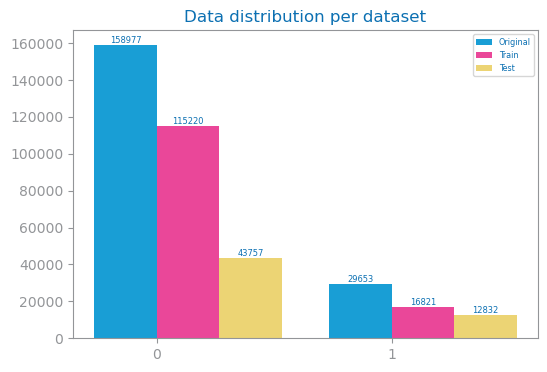

In [47]:
if evaluate ==True:
    
    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart


    # Call the function to split the data
    y_1, X_1, labels, values = define_target_and_prepare_data(df_1, target)

    train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=df_1.columns), y_1, data_columns=df_1.columns, target_column=target)


    # Distribution check
    values["Train"] = [
        len(train_1[train_1[target] == 0]),
        len(train_1[train_1[target] == 1]),
    ]
    values["Test"] = [
        len(test_1[test_1[target] == 0]),
        len(test_1[test_1[target] == 1]),
    ]

    # Visualize the distribution
    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")
    show()

In [7]:
# Verificar o intervalo de dias no conjunto de treino
min_day_train = train_1['day'].min()
max_day_train = train_1['day'].max()

# Verificar o intervalo de dias no conjunto de teste
min_day_test = test_1['day'].min()
max_day_test = test_1['day'].max()

# Exibir os resultados
print(f"Train set - Min day: {min_day_train}, Max day: {max_day_train}")
print(f"Test set - Min day: {min_day_test}, Max day: {max_day_test}")

Train set - Min day: -1.9146589047648075, Max day: 0.005433401922237548
Test set - Min day: 0.005433401922237548, Max day: 2.3522128878730704


## Scale 1 evaluate

### optimize for metric 1 - precision

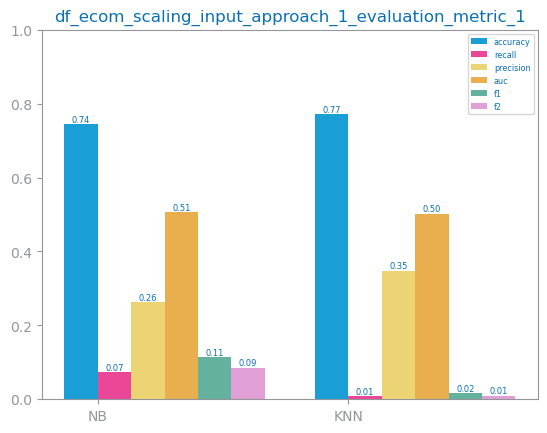

In [43]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values
if evaluate == True:
    
    figure()
    eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='is_purchase', metric=eval_metric_1)
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag}_approach_1_evaluation_metric_1", percentage=True
    )
    savefig(f"images/{file_tag}_approach_1_evaluation_metric_1.png")
    show()

### optimize for metric 2 - f2

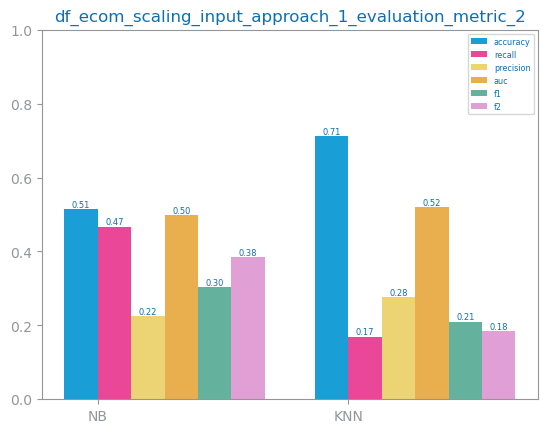

In [48]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values
if evaluate == True:
    
    figure()
    eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='is_purchase', metric=eval_metric_2)
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag}_approach_1_evaluation_metric_2", percentage=True
    )
    savefig(f"images/{file_tag}_approach_1_evaluation_metric_2.png")
    show()

# Scale 2 - MinMax Scaler


## Scale 2 strategy aplication

In [49]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler



def apply_strategy_2(df):

    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Scaling chapter
    df_copy=apply_min_max_scaler(df,target)

    return df_copy

df_2=apply_strategy_2(df)
df_2.columns

Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_purchase'],
      dtype='object')

## Scale 2 train/test split 

Labels=[0, 1]


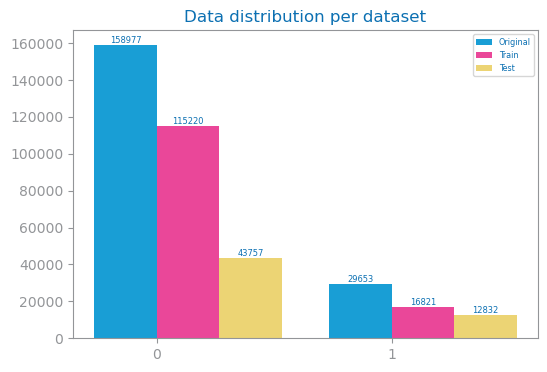

In [50]:
if evaluate==True:

    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart

    # train/test split from DSLABS Classification/Evaluation Chapter
    # created split_data_save_csv on data_functions

    # Call the functions to split the data

    y_2, X_2, labels, class_counts = define_target_and_prepare_data(df_2, target=target)

    train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=df_2.columns), y_2, data_columns=df_2.columns, target_column=target)


    values["Train"] = [
        len(train_2[train_2[target] == 0]),
        len(train_2[train_2[target] == 1]),
    ]
    values["Test"] = [
        len(test_2[test_2[target] == 0]),
        len(test_2[test_2[target] == 1]),
    ]

    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")

## Scale 2 evaluate

### optimize for metric 1 - precision

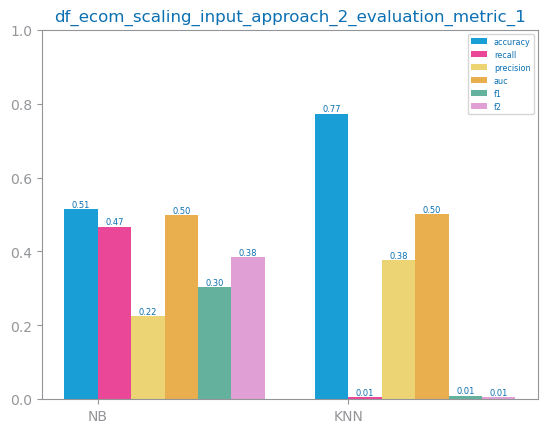

In [51]:
if evaluate == True:
    figure()
    eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='is_purchase', metric=eval_metric_1)
    plot_multibar_chart(
        ["NB", "KNN"], eval_2, title=f"{file_tag}_approach_2_evaluation_metric_1", percentage=True
    )
    savefig(f"images/{file_tag}_approach_2_evaluation_metric_1.png")
    show()

### optimize for metric 2 - f2

In [52]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler



def apply_strategy_2(df):

    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Scaling chapter
    df_copy=apply_min_max_scaler(df,target)

    return df_copy

df_2=apply_strategy_2(df)
df_2.columns

Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_purchase'],
      dtype='object')

Labels=[0, 1]


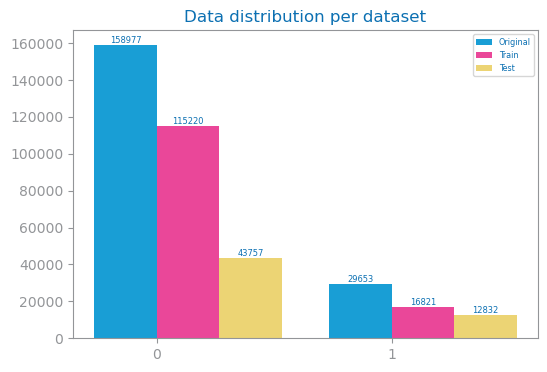

In [53]:
if evaluate==True:

    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart

    # train/test split from DSLABS Classification/Evaluation Chapter
    # created split_data_save_csv on data_functions

    # Call the functions to split the data

    y_2, X_2, labels, class_counts = define_target_and_prepare_data(df_2, target=target)

    train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=df_2.columns), y_2, data_columns=df_2.columns, target_column=target)


    values["Train"] = [
        len(train_2[train_2[target] == 0]),
        len(train_2[train_2[target] == 1]),
    ]
    values["Test"] = [
        len(test_2[test_2[target] == 0]),
        len(test_2[test_2[target] == 1]),
    ]

    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")

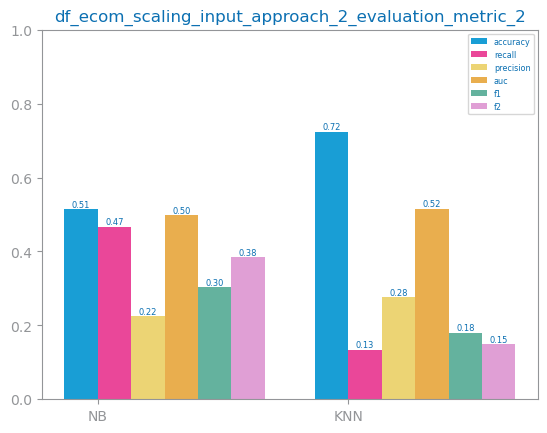

In [54]:
if evaluate == True:
    figure()
    eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='is_purchase', metric=eval_metric_2)
    plot_multibar_chart(
        ["NB", "KNN"], eval_2, title=f"{file_tag}_approach_2_evaluation_metric_2", percentage=True
    )
    savefig(f"images/{file_tag}_approach_2_evaluation_metric_2.png")
    show()

# scaling plot

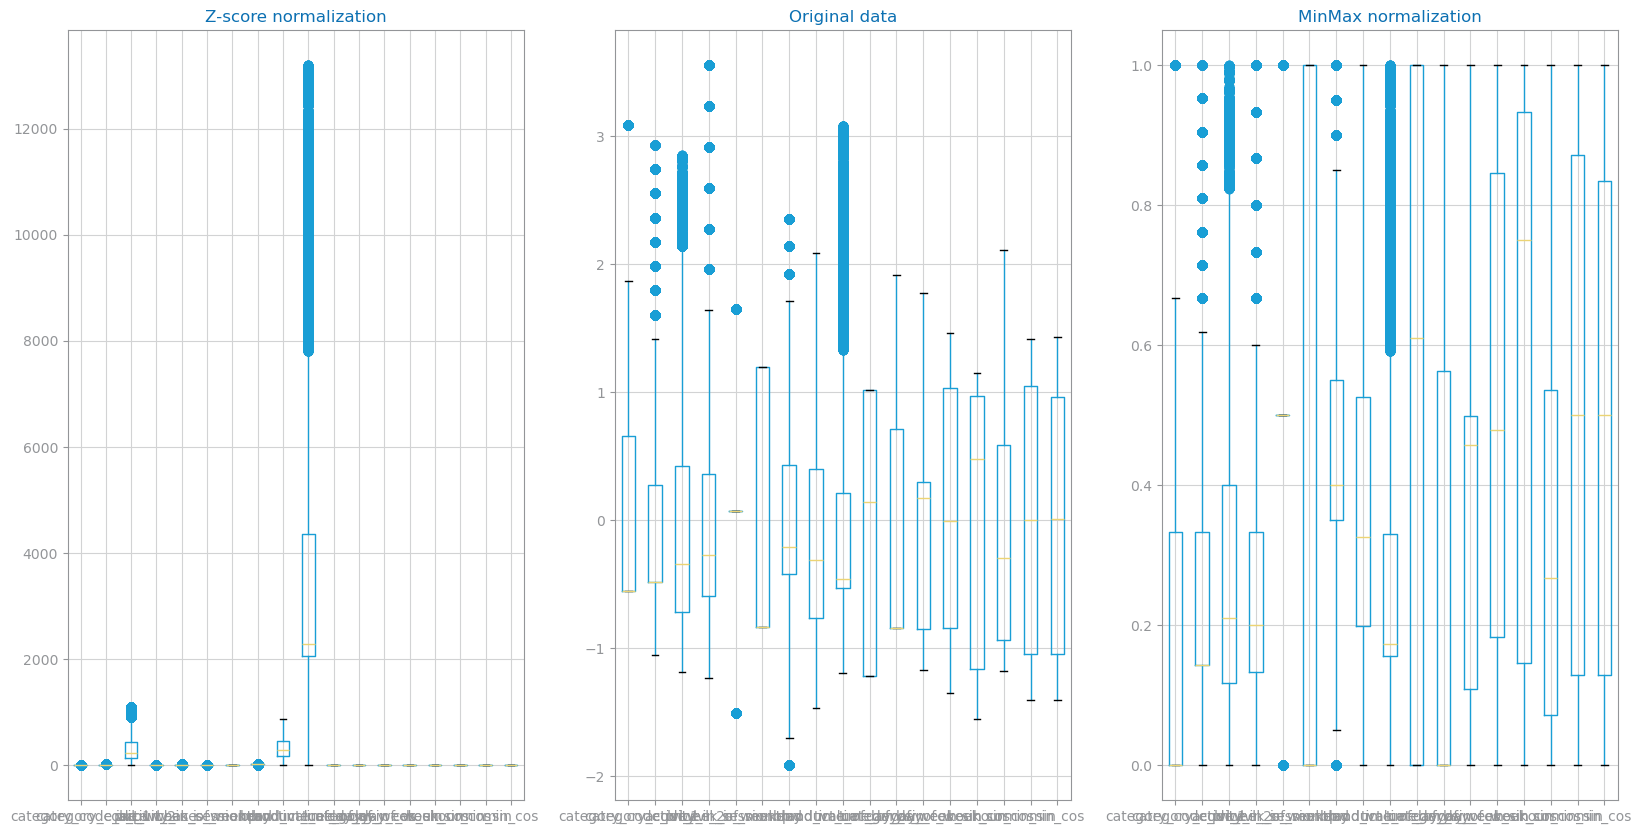

In [18]:
if evaluate == True:

    from matplotlib.pyplot import subplots, show

    fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
    axs[0, 1].set_title("Original data")
    df.boxplot(ax=axs[0, 0])

    axs[0, 0].set_title("Z-score normalization")
    df_1.boxplot(ax=axs[0, 1])

    axs[0, 2].set_title("MinMax normalization")
    df_2.boxplot(ax=axs[0, 2])
    show()

# Approach uplift comparison

## uplift df

In [55]:
if evaluate ==True:

    algorithms = ['Naive Bayes', 'KNN']

    # Create DataFrames for eval_1 and eval_2
    df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
    df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

    # Calculate uplift
    df_uplift = df_eval_2 - df_eval_1



    # Combine everything into one DataFrame (without misalignment issues)
    comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
    comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



    # Display the DataFrame
    display(comparison_df)

Approach 1                                                    \
              accuracy    recall precision       auc        f1        f2   
Naive Bayes   0.514517  0.466568  0.224948  0.497573  0.303547  0.384063   
KNN           0.711410  0.169342  0.276992  0.519859  0.210185  0.183614   

            Approach 2                                                    \
              accuracy    recall precision       auc        f1        f2   
Naive Bayes   0.514517  0.466568  0.224948  0.497573  0.303547  0.384063   
KNN           0.723657  0.134118  0.275448  0.515330  0.180398  0.149455   

               Uplift                                                   
             accuracy    recall precision       auc        f1       f2  
Naive Bayes  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  
KNN          0.012246 -0.035224 -0.001544 -0.004529 -0.029787 -0.03416

# Analysis

Scalling treatment:
- In Scalling treatment, let's go with approach 2 as has higher f2

Comparing with previous dataset:
- For now lets go with outliers dataset, becasue it has higer f2 thant the calling dataset

Decision:
- In balancing, use missing values dataset


# save to csv

In [56]:
if test_data==False:
    

    data_save=df.copy()

    # apply winning strategy
    data_save=apply_strategy_2(data_save)
        
    data_save.to_csv(f"dataset/df_ecom_2_4_scaler_input.csv", index=False)
    

    print(data_save.columns)

Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_purchase'],
      dtype='object')


## train test csv

In [57]:
if test_data==False:
    

    data_save_copy=data_save.copy()

    
    y, X, labels, class_counts = define_target_and_prepare_data(data_save_copy, target=target)

    train, test = split_data_save_csv(pd.DataFrame(X, columns=data_save_copy.columns), y, data_columns=data_save_copy.columns, target_column=target)  
    
    train.to_csv(f"dataset/df_ecom_2_4_scaler_input_train.csv", index=False)
    print(train.columns)
    
    test.to_csv(f"dataset/df_ecom_2_4_scaler_input_test.csv", index=False)
    print(test.columns)

Labels=[0, 1]
Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_purchase'],
      dtype='object')
Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_purchase'],
      dtype='object')
